# 印章制作工具

### 导包

In [1]:
from seal import SEAL
from utils import Images

# 初始化印章类
c = SEAL()
# 初始化绘图工具
d = Images()

image_size = (450,250)
txt_wh = (40, 30)
ellipse_ab = (200,100)
texts = "模拟的数据有限公司"

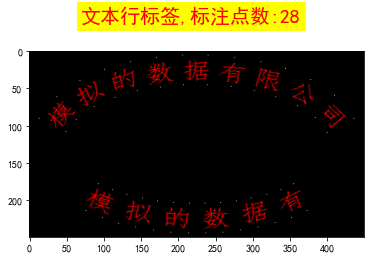

In [2]:
# 创建图片
d.create_image("draw_test.png",image_size)
# 生成整行文本以及box坐标
test_every_top_bottom = 0
# 生成单个文字以及对应box坐标
test_nums_top_bottom = 1


if test_nums_top_bottom:
    label_nums =28
    infos,label_infos = c.cal_text_and_label_pos(ellipse_ab,txt_wh,0,texts, label_nums=label_nums, top=True)
    
    for char,x,y,degree in infos:
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    
    for i in label_infos:
        d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
    
    infos,label_infos = c.cal_text_and_label_pos(ellipse_ab,txt_wh,0,texts[:6], label_nums=label_nums, top=False)
    for char,x,y,degree in infos:
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    for i in label_infos:
        d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
    d.show_image(f"文本行标签,标注点数:{label_nums}")

if test_every_top_bottom:
    # 计算每个字符的标注框
    infos,label_infos = c.cal_every_text_and_label_pos(ellipse_ab,txt_wh,0,texts, top=True)
    for char,x,y,degree in infos:
        # print(char,x,y,degree)
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    for label_info in label_infos[:3]:
        for i in label_info[:3]:
            # print(label_info[-1])
            d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))

    infos,label_infos = c.cal_every_text_and_label_pos(ellipse_ab,txt_wh,0,texts[:6], top=False)
    for char,x,y,degree in infos:
        print(char,x,y,degree)
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    for label_info in label_infos[:3]:
        for i in label_info[:3]:
            print(label_info[-1])
            d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
            
    d.show_image("单字标签")